# shLars polysome profiling

In [1]:
%%bash
ls *_R[1-2]_001*

16207X1_190807_A00421_0097_AHCHHWDRXX_S8_L001_R1_001.fastq.gz
16207X1_190807_A00421_0097_AHCHHWDRXX_S8_L001_R2_001.fastq.gz
16207X2_190807_A00421_0097_AHCHHWDRXX_S7_L001_R1_001.fastq.gz
16207X2_190807_A00421_0097_AHCHHWDRXX_S7_L001_R2_001.fastq.gz
16207X3_190807_A00421_0097_AHCHHWDRXX_S6_L001_R1_001.fastq.gz
16207X3_190807_A00421_0097_AHCHHWDRXX_S6_L001_R2_001.fastq.gz
16207X4_190807_A00421_0097_AHCHHWDRXX_S5_L001_R1_001.fastq.gz
16207X4_190807_A00421_0097_AHCHHWDRXX_S5_L001_R2_001.fastq.gz
16207X5_190807_A00421_0097_AHCHHWDRXX_S4_L001_R1_001.fastq.gz
16207X5_190807_A00421_0097_AHCHHWDRXX_S4_L001_R2_001.fastq.gz
16207X6_190807_A00421_0097_AHCHHWDRXX_S3_L001_R1_001.fastq.gz
16207X6_190807_A00421_0097_AHCHHWDRXX_S3_L001_R2_001.fastq.gz
16207X7_190807_A00421_0097_AHCHHWDRXX_S2_L001_R1_001.fastq.gz
16207X7_190807_A00421_0097_AHCHHWDRXX_S2_L001_R2_001.fastq.gz
16207X8_190807_A00421_0097_AHCHHWDRXX_S1_L001_R1_001.fastq.gz
16207X8_190807_A00421_0097_AHCHHWDRXX_S1_L001_R2_001.fastq.gz


### Trimming task

In [ ]:
%%bash
# Trimming task
for f1 in 16207X[1-8]_190807_A00421_0097_AHCHHWDRXX_S[1-8]_L001_R1_001.fastq.gz; do
    f2=${f1/R1_001.fastq.gz/R2_001.fastq.gz};     
    out1=${f1/R1_001.fastq.gz/out1.trim.fastq.gz};     
    out2=${f2/R2_001.fastq.gz/out2.trim.fastq.gz};     
    echo cutadapt -j 12 -q 15 -m 20 -a AGATCGGAAGAGCACACGTCTGAACTCCAGTCA -A AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTG -o $out1 -p $out2 $f1 $f2;
         cutadapt -j 12 -q 15 -m 20 -a AGATCGGAAGAGCACACGTCTGAACTCCAGTCA -A AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTG -o $out1 -p $out2 $f1 $f2 >> log.txt; 
done

In [2]:
%%bash
ls *trim*

16207X1_AHCHHWDRXX_S8_R1.trim.fastq.gz
16207X1_AHCHHWDRXX_S8_R2.trim.fastq.gz
16207X2_AHCHHWDRXX_S7_R1.trim.fastq.gz
16207X2_AHCHHWDRXX_S7_R2.trim.fastq.gz
16207X3_AHCHHWDRXX_S6_R1.trim.fastq.gz
16207X3_AHCHHWDRXX_S6_R2.trim.fastq.gz
16207X4_AHCHHWDRXX_S5_R1.trim.fastq.gz
16207X4_AHCHHWDRXX_S5_R2.trim.fastq.gz
16207X5_AHCHHWDRXX_S4_R1.trim.fastq.gz
16207X5_AHCHHWDRXX_S4_R2.trim.fastq.gz
16207X6_AHCHHWDRXX_S3_R1.trim.fastq.gz
16207X6_AHCHHWDRXX_S3_R2.trim.fastq.gz
16207X7_AHCHHWDRXX_S2_R1.trim.fastq.gz
16207X7_AHCHHWDRXX_S2_R2.trim.fastq.gz
16207X8_AHCHHWDRXX_S1_R1.trim.fastq.gz
16207X8_AHCHHWDRXX_S1_R2.trim.fastq.gz


### Alignment task

In [ ]:
%%bash
for f1 in *_R1.trim.fastq.gz; do
    f2=${f1/_R1.trim.fastq.gz/_R2.trim.fastq.gz};     
	out=${f1/_R1.trim.fastq.gz/_}   
    STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand zcat --runThreadN 8 --sjdbGTFfile /rumi/shams/genomes/mm10/mm10_ensemble_genes.gtf --genomeDir /rumi/shams/genomes/mm10 --readFilesIn $f1 $f2 --outFileNamePrefix $out
done&

In [3]:
%%bash
ls *.bam

16207X1_AHCHHWDRXX_S8_Aligned.sortedByCoord.out.bam
16207X2_AHCHHWDRXX_S7_Aligned.sortedByCoord.out.bam
16207X3_AHCHHWDRXX_S6_Aligned.sortedByCoord.out.bam
16207X4_AHCHHWDRXX_S5_Aligned.sortedByCoord.out.bam
16207X5_AHCHHWDRXX_S4_Aligned.sortedByCoord.out.bam
16207X6_AHCHHWDRXX_S3_Aligned.sortedByCoord.out.bam
16207X7_AHCHHWDRXX_S2_Aligned.sortedByCoord.out.bam
16207X8_AHCHHWDRXX_S1_Aligned.sortedByCoord.out.bam


### Measure counts

In [ ]:
%%bash
for f in *_Aligned.sortedByCoord.out.bam; do
    out=${f/.bam/.gene.fc}
    featureCounts -T 12 -P -B -C -O -t exon -g gene_id -a /rumi/shams/genomes/mm10/mm10_ensemble_genes.gtf -o $out $f;
done

In [4]:
%%bash
ls *.gene.fc

16207X1_AHCHHWDRXX_S8.gene.fc
16207X2_AHCHHWDRXX_S7.gene.fc
16207X3_AHCHHWDRXX_S6.gene.fc
16207X4_AHCHHWDRXX_S5.gene.fc
16207X5_AHCHHWDRXX_S4.gene.fc
16207X6_AHCHHWDRXX_S3.gene.fc
16207X7_AHCHHWDRXX_S2.gene.fc
16207X8_AHCHHWDRXX_S1.gene.fc


# Load R

In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
%%R
library(DESeq2,  quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(ggrepel, quietly = TRUE)
library(EnhancedVolcano, quietly = TRUE)
library(ggpubr, quietly = TRUE)

## Read data 

In [5]:
%%R
files <- list.files(pattern=".fc$")

cell.line   <- c(rep("KO",2),rep("WT",6))
replicate <- c(rep("",2), rep('1',2), rep('2',2), rep('3',2))
sample.type <- c(rep(c("Input","Arc_IP"),4))
cond <- paste(cell.line, sample.type, sep="_")
all_cond <- paste(cell.line, replicate, sample.type, sep="_")

datalist <- lapply(files, function(x){read.table(file=x,header=TRUE,colClasses=c(NA, "NULL", "NULL", "NULL", "NULL", "NULL", NA),check.names=F)})
m <- Reduce(function(...) merge(..., by=1, all = TRUE), datalist)
rownames(m) <- m[,1]
m <- m[,-1]
m[is.na(m)]<-0
m <- round(m)
colnames(m) <- gsub("_Aligned.sortedByCoord.out.bam", "", colnames(m))
colData <- data.frame(cond, row.names=colnames(m))

# DE Analysis

In [6]:
%%R
dds <- DESeqDataSetFromMatrix(countData = m, colData = colData, design = ~ cond)
dds$cond <- relevel(dds$cond, ref="WT_Input")
dds <- DESeq(dds)
resultsNames(dds)
ncu <- counts(dds, normalized=TRUE)
write.table(ncu, file="gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=NA) 
write.table(m, file="gene_count_table_raw.txt", sep="\t", quote=FALSE, col.names=NA )
cds <- estimateDispersions(dds)
vsd <- varianceStabilizingTransformation(cds)

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates



### PCA 

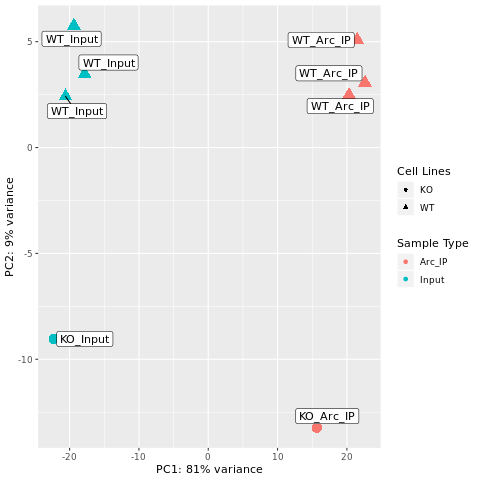

In [7]:
%%R
z <- plotPCA(vsd,intgroup=c("cond"), returnData=TRUE)
percentVar <- round(100 * attr(z, "percentVar"))
p <- ggplot(z, aes(PC1, PC2)) +
  geom_point(aes(size = 4, color = sample.type, shape = cell.line)) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) +
  geom_label_repel(label = cond, force = 10) +
  labs(shape="Cell Lines", colour="Sample Type") +
  guides(size = FALSE)
print (p)

### Model $$(WT ArcIP - WT Input) - (KO ArcIP - KO Input)$$

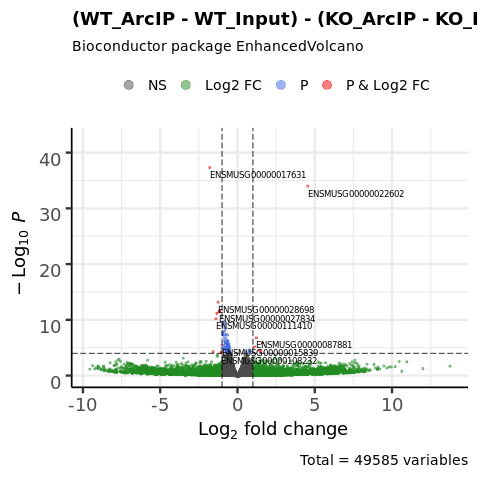

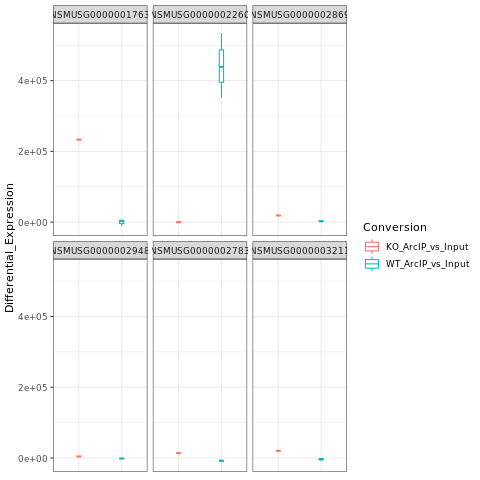

In [25]:
%%R
res <- results(dds, contrast=list(c('cond_WT_Arc_IP_vs_WT_Input', 'cond_KO_Input_vs_WT_Input'),
                                   c('cond_KO_Arc_IP_vs_WT_Input')), listValues=c(1,-1))
write.table(res, "WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA )
# Volcano plot 
vol <- EnhancedVolcano(res,
    lab = rownames(res),
    x = 'log2FoldChange',
    y = 'pvalue',
#     xlim = c(-6, 6),
    title = '(WT_ArcIP - WT_Input) - (KO_ArcIP - KO_Input)',
    pCutoff = 10e-5,
    FCcutoff = 1)
print (vol)

# check top genes 
top_genes <- rownames(head(res[order(res$pvalue),]))
myplots <- list() 
check <- data.frame()
for (g in 1:length(top_genes)){
    check <- rbind(check,data.frame(
                        'Differential_Expression' = c(
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Input'))],
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Input'))]),
                        'Conversion' = c(rep('WT_ArcIP_vs_Input',3),rep('KO_ArcIP_vs_Input',1)),
                        'Gene' = top_genes[g]))
    rownames(check) <- c()

}
ggplot(data = check, mapping = aes(x = Conversion, y = Differential_Expression, color = Conversion)) +
    geom_boxplot(width=0.1)+
    scale_fill_grey() +
    theme_bw() +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
    facet_wrap(facets = vars(Gene))

In [37]:
%%R
positive_res <- subset (res, log2FoldChange > 0)
write.table(positive_res, "positive_WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA )
# positive_ncu <- 
positive_ncu <- ncu[rownames(positive_res),]
# write.table(positive_ncu, file="positive_gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=NA) 
